In [1]:
import os
import numpy as np
import tensorflow as tf
import keras
import numpy as np
import cv2 
import glob



Using TensorFlow backend.


In [2]:
model = tf.keras.applications.VGG19(weights='imagenet', include_top=False)

In [3]:
#function to extract feature form images using vgg19 model and resize images to 512 x 512
#Convert our image database into feature vectors using VGG model
def extract_vector(path):
    vgg_feature_list = []

    for im in glob.glob(path):

        im = cv2.imread(im)
        im = cv2.resize(im,(512,512))
        img = tf.keras.applications.vgg19.preprocess_input(np.expand_dims(im.copy(), axis=0))
        vgg_feature = model.predict(img)
        vgg_feature_np = np.array(vgg_feature)
        vgg_feature_list.append(vgg_feature_np.flatten())

    return np.array(vgg_feature_list)

In [4]:
x = extract_vector('train/*')

In [ ]:
#use Kmeans for clustering
#code for finding right valuse of using "elbow method" 

from sklearn.cluster import KMeans
k_values = [2,3,4,5,6,7,8,9]
loss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i, n_jobs=-1).fit(x)
    loss.append(kmeans.inertia_)

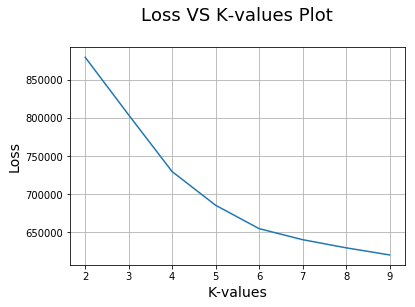

In [21]:
import matplotlib.pyplot as plt
plt.plot(k_values, loss)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

In [23]:
#as we can observe from k=6 linearity stars so n_clusters=6
kmeans = KMeans(n_clusters=6, random_state=0, n_jobs=-1).fit(x)

In [27]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(x[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(x[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(x[i])
    elif kmeans.labels_[i] == 3:
        cluster4.append(x[i])
    elif kmeans.labels_[i] == 4:
        cluster5.append(x[i])    
    else :
        cluster6.append(x[i]) 
        
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))
print("\nNo. of reviews in Cluster-5 : ",len(cluster5))
print("\nNo. of reviews in Cluster-6 : ",len(cluster6))

No. of reviews in Cluster-1 :  872

No. of reviews in Cluster-2 :  849

No. of reviews in Cluster-3 :  603

No. of reviews in Cluster-4 :  679

No. of reviews in Cluster-5 :  674

No. of reviews in Cluster-6 :  1061


In [37]:
count=1
for i in range(3):
    print('image-%d : \n %s\n'%(count,cluster1[i]))
    count +=1

image-1 : 
 [0.5673914  0.10983701 0.02583745 ... 0.08807462 0.01594158 0.09149215]

image-2 : 
 [0.11487017 0.23240826 0.05111597 ... 0.02474875 0.00076864 0.13929343]

image-3 : 
 [0.50142515 0.32078543 0.05713119 ... 0.02702948 0.00588839 0.01556033]

